<a href="https://colab.research.google.com/github/Nicolas-Ayala-Collazos/ML/blob/main/Barrido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Reemplaza esto con la ruta de tu archivo
file_path = '/content/EXTRACCIÓN AFECTACIONES ENERO2023.csv'

# Cargar el conjunto de datos
dataset = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')

# Convertir las columnas de fecha a tipo datetime
dataset['FECHA_INICIO_ETAPA'] = pd.to_datetime(dataset['FECHA_INICIO_ETAPA'])
dataset['FECHA_FIN_ETAPA'] = pd.to_datetime(dataset['FECHA_FIN_ETAPA'])

# Filtrar eventos con afectaciones de 3 minutos o menos
dataset_filtrado = dataset[dataset['MINUTOS_AFECTACION'] <= 3]

# Función para verificar si la afectación ocurre entre las 6 pm y 6 am
def es_horario_ap(fecha_inicio, fecha_fin):
    return ((fecha_inicio.hour >= 18) or (fecha_fin.hour < 6))

# Aplicar la función y calcular los clientes AP afectados en el horario específico
dataset_filtrado['CLIENTES_AP_AFECTADOS'] = dataset_filtrado.apply(
    lambda x: x['CLIENTES_AP'] if es_horario_ap(x['FECHA_INICIO_ETAPA'], x['FECHA_FIN_ETAPA']) else 0, axis=1
)

# Agrupar por CODIGO_EVENTO, CODIGO_CONEXION y CAUSA, y luego sumar los clientes afectados
clientes_afectados_unicos = dataset_filtrado.groupby(['CODIGO_EVENTO', 'CODIGO_CONEXION', 'CAUSA'])['CLIENTES', 'CLIENTES_AP_AFECTADOS'].sum()

# Sumar los clientes afectados únicos para todos los eventos por cada CAUSA
total_clientes_afectados_por_causa = clientes_afectados_unicos.groupby('CAUSA').sum()

# Cálculo del MAIFI por cada CAUSA
poblacion_total_clientes = 3833521  # Población total de clientes
maifi_por_causa = total_clientes_afectados_por_causa.sum(axis=1) / poblacion_total_clientes

# Imprimir el resultado del MAIFI por cada CAUSA
print("MAIFI por cada CAUSA:")
print(maifi_por_causa)


<ipython-input-2-bdad7ce3e48f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtrado['CLIENTES_AP_AFECTADOS'] = dataset_filtrado.apply(
<ipython-input-2-bdad7ce3e48f>:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clientes_afectados_unicos = dataset_filtrado.groupby(['CODIGO_EVENTO', 'CODIGO_CONEXION', 'CAUSA'])['CLIENTES', 'CLIENTES_AP_AFECTADOS'].sum()


MAIFI por cada CAUSA:
CAUSA
CATÁSTROFES NATURALES                                 0.003795
EVENTO RETIE                                          0.051098
EVENTOS DE ACTIVOS DEL STN Y AL STR                   0.006458
EXIGENCIA TRASLADO Y ADECUACIÓN DE INFRAESTRUCTURA    0.004324
FUERZA MAYOR                                          0.167407
INTERRUPCIONES NO PROGRAMADAS NO EXCLUIBLES           1.936686
INTERRUPCIONES PROGRAMADAS NO EXCLUIBLES              0.090616
dtype: float64


In [ ]:
maifi_por_causa

CAUSA
CATÁSTROFES NATURALES                                 0.003795
EVENTO RETIE                                          0.051098
EVENTOS DE ACTIVOS DEL STN Y AL STR                   0.006458
EXIGENCIA TRASLADO Y ADECUACIÓN DE INFRAESTRUCTURA    0.004324
FUERZA MAYOR                                          0.167407
INTERRUPCIONES NO PROGRAMADAS NO EXCLUIBLES           1.936686
INTERRUPCIONES PROGRAMADAS NO EXCLUIBLES              0.090616
dtype: float64

In [ ]:
!pip install geopandas networkx
import geopandas as gpd

In [ ]:
shapefile = gpd.read_file('/content/GALAN.shp')

In [ ]:

import networkx as nx
from shapely.geometry import LineString, MultiPoint, Point



# Crear el grafo
G = nx.Graph()

for index, row in shapefile.iterrows():
    geom = row.geometry
    if isinstance(geom, LineString):
        # Manejar LineString
        if hasattr(geom.boundary, '__iter__'):
            start, end = geom.boundary
            G.add_edge((start.x, start.y), (end.x, end.y))
        else:
            coords = list(geom.coords)
            start = Point(coords[0])
            end = Point(coords[-1])
            G.add_edge((start.x, start.y), (end.x, end.y))
    elif isinstance(geom, MultiPoint):
        # Manejar MultiPoint
        points = list(geom)
        for i in range(len(points)):
            for j in range(i+1, len(points)):
                point1 = points[i]
                point2 = points[j]
                G.add_edge((point1.x, point1.y), (point2.x, point2.y))


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', None)     # Muestra todas las filas
pd.set_option('display.max_colwidth', None) # Muestra el contenido completo de cada celda
pd.set_option('display.width', None)
print(shapefile.head())

   ID_ENTITA  ID_SOTTOEN TIPO_TRONC NETWORK_TY        IK LOCAL_SYST  NUMSIMBOLO  ID_LAYER  \
0       36.0         1.0          C          M   39116.0       None       -23.0       0.0   
1       36.0         1.0          C          M   39117.0       None       -23.0       0.0   
2       36.0         1.0          C          M   39118.0       None       -23.0       0.0   
3       36.0         1.0          C          M   39122.0       None       -23.0       0.0   
4       36.0         4.0          A          M  242980.0       None       -22.0       0.0   

                       NOTE                    LABEL               DENOMINAZI         LEGACY_COD  \
0  r_linea_mt237:(55558790)  500 MCM AL TRIPLEX XLPE  E1.50731687|E1.53975472   COD-TMM-56718885   
1  r_linea_mt237:(55558790)  500 MCM AL TRIPLEX XLPE        82492|E1.53975472   COD-TMM-56718863   
2  r_linea_mt237:(55558790)  500 MCM AL TRIPLEX XLPE  E1.50731687|E1.53975460   COD-TMM-55558797   
3          IUA205470011000/          300 

In [ ]:
import geopandas as gpd
import folium

# Cargar el shapefile

# Coordenadas para centrar el mapa en Cundinamarca (Bogotá)
latitud_centro = 4.7110
longitud_centro = -74.0721

# Crear un mapa base de Folium
mapa = folium.Map(location=[latitud_centro, longitud_centro], zoom_start=9) # Ajusta el zoom según necesidad

# Añadir la capa del shapefile al mapa
folium.GeoJson(shapefile).add_to(mapa)

# Mostrar el mapa
mapa


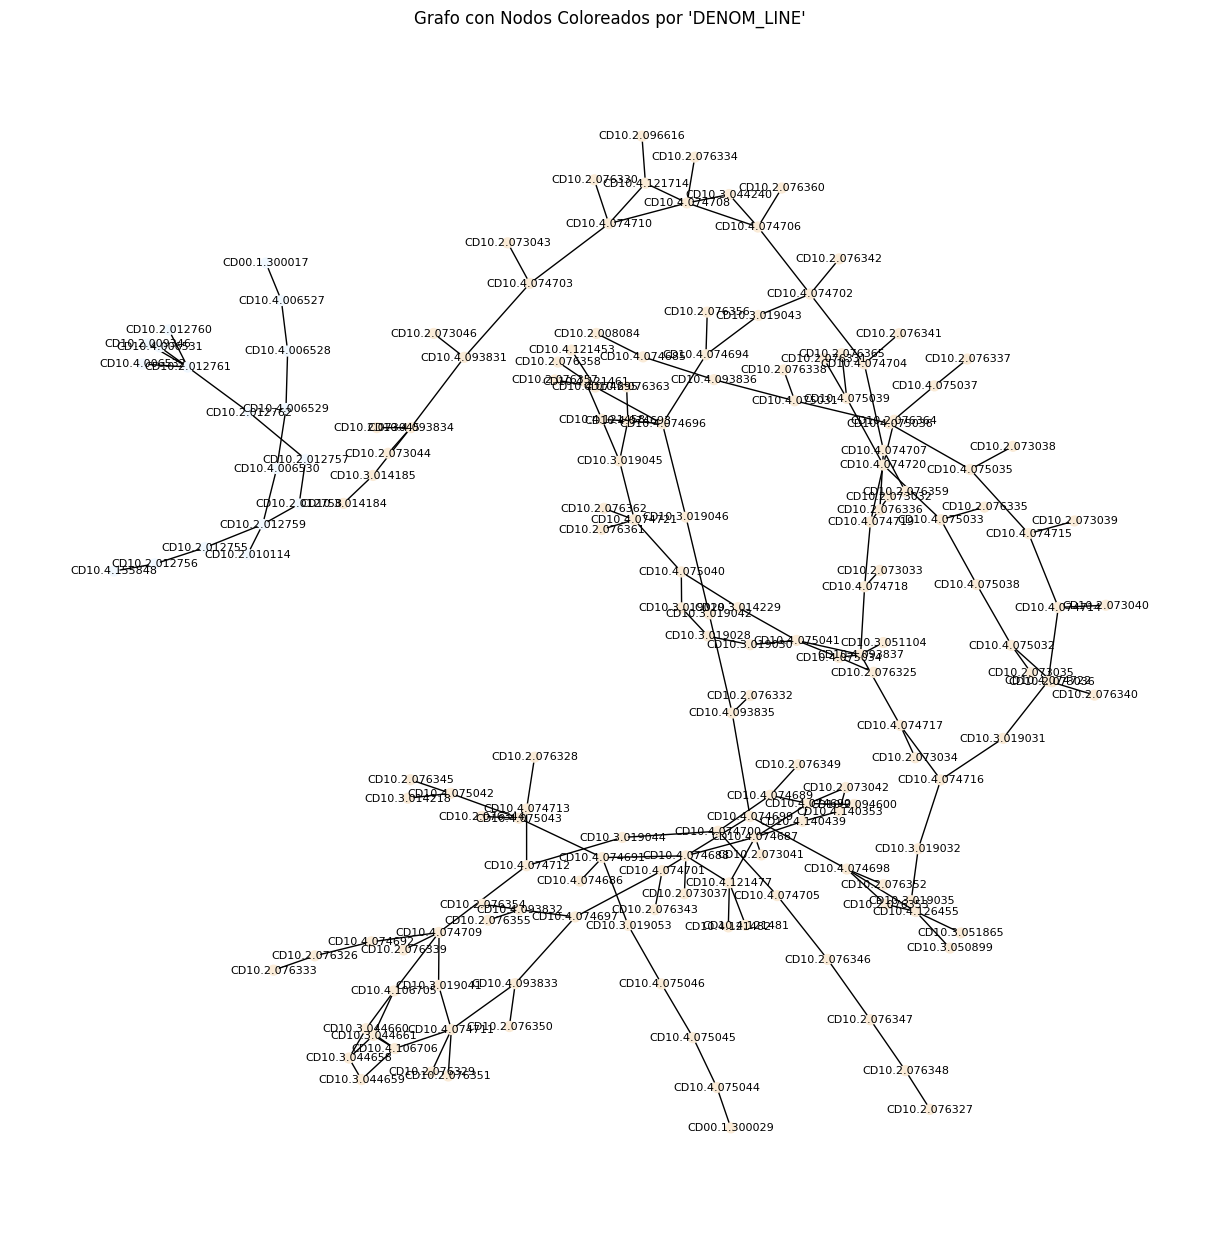

In [ ]:
import matplotlib.colors as mcolors
import numpy as np

# Crear un mapeo de colores para 'DENOM_LINE'
valores_denom_line = shapefile['DENOM_LINE'].unique()
colores = list(mcolors.CSS4_COLORS.values())  # Lista de colores posibles
mapeo_colores = {denom: colores[i % len(colores)] for i, denom in enumerate(valores_denom_line)}

# Asignar un color a cada nodo en el grafo basado en 'DENOM_LINE'
color_nodo = []
for nodo in nuevo_grafo.nodes():
    # Encontrar la fila correspondiente en el shapefile
    fila_correspondiente = shapefile[shapefile['LINE_SEGME'].str.contains(nodo, na=False)]
    if not fila_correspondiente.empty:
        denom_line = fila_correspondiente.iloc[0]['DENOM_LINE']
        color_nodo.append(mapeo_colores.get(denom_line, "black"))  # Color por defecto es negro
    else:
        color_nodo.append("black")  # Color por defecto si no se encuentra

# Visualizar el grafo con colores basados en 'DENOM_LINE'
plt.figure(figsize=(12, 12))
pos_nuevo = nx.spring_layout(nuevo_grafo, seed=42)
nx.draw(nuevo_grafo, pos_nuevo, node_color=color_nodo, with_labels=True, node_size=50, font_size=8)
plt.title("Grafo con Nodos Coloreados por 'DENOM_LINE'")
plt.show()



In [ ]:
import geopandas as gpd
import networkx as nx
import folium
import ipywidgets as widgets
from IPython.display import display, clear_output
from shapely.geometry import LineString

# Cargar shapefile y crear grafo
shapefile_path = '/content/GALAN.shp'
shapefile = gpd.read_file(shapefile_path)
G = nx.Graph()
for index, row in shapefile.iterrows():
    segmento = row['LINE_SEGME'].split('-')[:2]
    if len(segmento) == 2:
        G.add_edge(segmento[0], segmento[1])

# Widget de autocompletado de nodo
nodo_selector = widgets.Combobox(options=list(G.nodes), description='Nodo:', ensure_option=True, disabled=False)

# Función para manejar el evento del botón
def on_button_clicked(b):
    with out:
        clear_output()
        nodo = nodo_selector.value
        nodos_ruta = encontrar_conexiones_aguas_abajo(nodo, G, shapefile)

        # Crear un nuevo mapa para mostrar la ruta y el nodo seleccionado
        m = folium.Map(location=[4.7110, -74.0721], zoom_start=12)
        for n in nodos_ruta:
            if shapefile['LINE_SEGME'].str.contains(n).any():
                line = shapefile.loc[shapefile['LINE_SEGME'].str.contains(n), 'geometry'].iloc[0]
                if isinstance(line, LineString):
                    x, y = line.coords[0]
                    folium.CircleMarker(location=(y, x), radius=5, color='blue', fill=True).add_to(m)
                    if n == nodo:  # Agregar etiqueta solo para el nodo seleccionado
                        folium.Marker(location=(y, x), popup=n).add_to(m)
        display(m)

# Botón para mostrar la ruta
boton = widgets.Button(description='Mostrar Ruta')
boton.on_click(on_button_clicked)

# Widget de salida para el mapa
out = widgets.Output()

display(nodo_selector, boton, out)




Combobox(value='', description='Nodo:', ensure_option=True, options=('CD10.4.006529', 'CD10.4.006530', 'CD10.2…

Button(description='Mostrar Ruta', style=ButtonStyle())

Output()

In [ ]:
import geopandas as gpd
import networkx as nx
import pandas as pd

# Cargar el shapefile
shapefile_path = '/content/GALAN.shp'  # Asegúrate de reemplazar esto con la ruta correcta a tu shapefile
shapefile = gpd.read_file(shapefile_path)

# Crear el grafo
G = nx.Graph()
for index, row in shapefile.iterrows():
    segmento = row['LINE_SEGME'].split('-')[:2]
    if len(segmento) == 2:
        G.add_edge(segmento[0], segmento[1])

# Función para realizar el barrido eléctrico desde un nodo dado
def barrido_electrico_desde_nodo(nodo_inicial, grafo, shapefile):
    nodos_a_explorar = [nodo_inicial]
    nodos_visitados = set()
    nodos_barrido = []

    while nodos_a_explorar:
        nodo_actual = nodos_a_explorar.pop(0)
        if nodo_actual not in nodos_visitados:
            nodos_visitados.add(nodo_actual)
            nodos_barrido.append(nodo_actual)

            # Agregar nodos conectados que no han sido visitados
            for vecino in grafo.neighbors(nodo_actual):
                if vecino not in nodos_visitados:
                    nodos_a_explorar.append(vecino)

    return nodos_barrido

# Ejemplo: Realizar un barrido eléctrico desde el nodo 'CD10.3.019031'
nodos_barrido_ejemplo = barrido_electrico_desde_nodo('CD10.3.019031', G, shapefile)
nodos_barrido_ejemplo


In [ ]:
import geopandas as gpd
import networkx as nx
import pandas as pd

# Cargar el shapefile
shapefile = gpd.read_file('/content/GALAN.shp')

# Crear el grafo y asignar numeración secuencial desde 'CD00.1.300029'
G = nx.Graph()
numeracion_nodos = {}
contador = 0
nodo_inicial_numeracion = 'CD00.1.300029'

for index, row in shapefile.iterrows():
    segmento = row['LINE_SEGME'].split('-')[:2]
    if len(segmento) == 2:
        nodo_inicio, nodo_fin = segmento
        G.add_edge(nodo_inicio, nodo_fin)
        if nodo_inicio not in numeracion_nodos:
            numeracion_nodos[nodo_inicio] = contador
            contador += 1
        if nodo_fin not in numeracion_nodos:
            numeracion_nodos[nodo_fin] = contador
            contador += 1

# Función para realizar un barrido eléctrico "aguas arriba" considerando la numeración secuencial
# Definir la función para realizar un barrido eléctrico "aguas abajo" considerando sólo la numeración mayor
# Definir la función para realizar un barrido eléctrico "aguas abajo" considerando sólo la numeración mayor
# Definición de la función para realizar un barrido eléctrico "aguas abajo" considerando sólo la numeración mayor
# Corrigiendo el error de sintaxis y ejecutando el código para obtener los nodos "aguas abajo"

# Definición de la función para realizar un barrido eléctrico "aguas abajo" considerando sólo la numeración mayor
# Función para realizar un barrido eléctrico "aguas abajo" con restricciones adicionales
def barrido_electrico_restringido(nodo_inicial, shapefile, numeracion_nodos, numeracion_inicial):
    nodos_a_explorar = [nodo_inicial]
    nodos_visitados = set()
    nodos_barrido = []

    while nodos_a_explorar:
        nodo_actual = nodos_a_explorar.pop(0)
        if nodo_actual not in nodos_visitados and numeracion_nodos[nodo_actual] > numeracion_inicial:
            nodos_visitados.add(nodo_actual)
            nodos_barrido.append(nodo_actual)

            # Explorar conexiones en LINE_SEGME que incluyen el nodo actual
            segmentos_con_nodo = shapefile[shapefile['LINE_SEGME'].str.contains(nodo_actual)]
            for _, row in segmentos_con_nodo.iterrows():
                segmento = row['LINE_SEGME'].split('-')[:2]
                for nodo in segmento:
                    if nodo != nodo_actual and nodo not in nodos_visitados and numeracion_nodos.get(nodo, -1) > numeracion_inicial:
                        nodos_a_explorar.append(nodo)

    return nodos_barrido

# Numeración inicial del nodo 'CD00.1.300029'
numeracion_inicial = numeracion_nodos['CD00.1.300029']

# Realizar el barrido eléctrico "aguas abajo" desde 'CD10.3.019031' con las restricciones adicionales
nodos_barrido_aguas_abajo_restringido = barrido_electrico_restringido('CD10.3.019031', shapefile, numeracion_nodos, numeracion_inicial)

# Mostrar los resultados en forma tabular
df_aguas_abajo_restringido = pd.DataFrame({
    'Nodo': nodos_barrido_aguas_abajo_restringido,
    'Numeración': [numeracion_nodos[nodo] for nodo in nodos_barrido_aguas_abajo_restringido]
})
df_aguas_abajo_restringido




,Nodo,Numeración
0,CD10.3.019031,101
1,CD10.4.074716,79
2,CD10.4.074722,102
3,CD10.2.076340,130
4,CD10.4.074714,77
5,CD10.4.074715,75
6,CD10.2.073040,78
7,CD10.2.073039,76
8,CD10.4.075035,109
9,CD10.4.075036,108


In [ ]:
import geopandas as gpd
import networkx as nx
import folium
import ipywidgets as widgets
from IPython.display import display, clear_output

# Cargar el shapefile
shapefile_path = '/content/GALAN.shp'  # Cambia esto por la ruta de tu archivo
shapefile = gpd.read_file(shapefile_path)

# Crear el grafo y asignar numeración secuencial
G = nx.Graph()
#numeracion_nodos = {}
numeracion_nodos = {'CD00.1.300029': 0}
contador = 1
for index, row in shapefile.iterrows():
    segmento = row['LINE_SEGME'].split('-')[:2]
    if len(segmento) == 2:
        G.add_edge(segmento[0], segmento[1])
        if segmento[0] not in numeracion_nodos:
            numeracion_nodos[segmento[0]] = contador
            contador += 1
        if segmento[1] not in numeracion_nodos:
            numeracion_nodos[segmento[1]] = contador
            contador += 1

# Función para realizar el barrido eléctrico con restricciones
def barrido_electrico_restringido(nodo_inicial, shapefile, numeracion_nodos, numeracion_inicial):
    nodos_a_explorar = [nodo_inicial]
    nodos_visitados = set()
    nodos_barrido = []

    while nodos_a_explorar:
        nodo_actual = nodos_a_explorar.pop(0)
        if nodo_actual not in nodos_visitados and numeracion_nodos[nodo_actual] > numeracion_inicial:
            nodos_visitados.add(nodo_actual)
            nodos_barrido.append(nodo_actual)

            segmentos_con_nodo = shapefile[shapefile['LINE_SEGME'].str.contains(nodo_actual)]
            for _, row in segmentos_con_nodo.iterrows():
                segmento = row['LINE_SEGME'].split('-')[:2]
                for nodo in segmento:
                    if nodo != nodo_actual and nodo not in nodos_visitados and numeracion_nodos.get(nodo, -1) > numeracion_inicial:
                        nodos_a_explorar.append(nodo)

    return nodos_barrido

# Widget de autocompletado de nodo
nodo_selector = widgets.Combobox(options=list(G.nodes), description='Nodo:', ensure_option=True, disabled=False)

# Función para manejar el evento del botón
def on_button_clicked(b):
    with out:
        clear_output()
        nodo = nodo_selector.value
        numeracion_inicial = numeracion_nodos['CD00.1.300029']
        nodos_barrido = barrido_electrico_restringido(nodo, shapefile, numeracion_nodos, numeracion_inicial)

        # Crear y mostrar el mapa
                # Crear y mostrar el mapa
        m = folium.Map(location=[4.7110, -74.0721], zoom_start=12)
        for n in nodos_barrido:
            nodo_info = shapefile[shapefile['LINE_SEGME'].str.contains(n)]
            if not nodo_info.empty:
                geometry = nodo_info.iloc[0]['geometry']
                coords = list(geometry.coords)
                for coord in coords:
                    color = 'green' if 'CD10.3.' in n else 'red' if 'CD10.2.' in n else 'blue'
                    folium.CircleMarker(location=[coord[1], coord[0]], radius=5, color=color, fill=True, popup=n).add_to(m)

        # Agregar marcador para el nodo seleccionado
        if nodo in numeracion_nodos:
            nodo_info = shapefile[shapefile['LINE_SEGME'].str.contains(nodo)]
            if not nodo_info.empty:
                geometry = nodo_info.iloc[0]['geometry']
                coord = list(geometry.coords)[0]
                folium.Marker(location=[coord[1], coord[0]], popup=nodo, icon=folium.Icon(color='darkblue', icon='info-sign')).add_to(m)

        # Encontrar el nodo correspondiente a la numeración inicial
        nodo_numeracion_inicial = None
        for nodo, numeracion in numeracion_nodos.items():
            if numeracion == numeracion_inicial:
                nodo_numeracion_inicial = nodo
                break

        # Agregar marcador para el nodo con la numeración inicial
        if nodo_numeracion_inicial:
            nodo_info = shapefile[shapefile['LINE_SEGME'].str.contains(nodo_numeracion_inicial)]
            if not nodo_info.empty:
                geometry = nodo_info.iloc[0]['geometry']
                coord = list(geometry.coords)[0]
                folium.Marker(
                    location=[coord[1], coord[0]],
                    popup=f"Nodo {nodo_numeracion_inicial}, Numeración: {numeracion_inicial}",
                    icon=folium.Icon(color='purple', icon='info-sign')
                ).add_to(m)



        display(m)

        # Mostrar los nodos aguas abajo
        print("Nodos aguas abajo del nodo seleccionado:")
        for n in nodos_barrido:
            print(n)

# Botón para mostrar la ruta
boton = widgets.Button(description='Mostrar Ruta')
boton.on_click(on_button_clicked)

# Widget de salida para el mapa
out = widgets.Output()

display(nodo_selector, boton, out)



Combobox(value='', description='Nodo:', ensure_option=True, options=('CD10.4.006529', 'CD10.4.006530', 'CD10.2…

Button(description='Mostrar Ruta', style=ButtonStyle())

Output()

In [ ]:
import geopandas as gpd
import networkx as nx
import folium
import ipywidgets as widgets
from IPython.display import display, clear_output

# Cargar el shapefile
shapefile_path = '/content/GALAN.shp'  # Cambia esto por la ruta de tu archivo
shapefile = gpd.read_file(shapefile_path)

# Crear el grafo y asignar numeración secuencial
G = nx.Graph()
#numeracion_nodos = {'CD00.1.300029': {'numeracion': 0, 'bifurcacion': 0}}
numeracion_nodos = {}
contador_numeracion = 1
contador_bifurcacion = 1

for index, row in shapefile.iterrows():
    segmento = row['LINE_SEGME'].split('-')[:2]
    if len(segmento) == 2:
        G.add_edge(segmento[0], segmento[1])

        for nodo in segmento:
            if nodo not in numeracion_nodos:
                numeracion_nodos[nodo] = {'numeracion': contador_numeracion, 'bifurcacion': contador_bifurcacion}
                contador_numeracion += 1

        # Verificar y actualizar el contador de bifurcaciones si es necesario
        for nodo in segmento:
            if G.degree(nodo) > 2 and numeracion_nodos[nodo]['bifurcacion'] == contador_bifurcacion:
                contador_bifurcacion += 1
                for n in G.nodes:
                    if G.degree(n) > 2:
                        numeracion_nodos[n]['bifurcacion'] = contador_bifurcacion

# Función para realizar el barrido eléctrico con restricciones
def barrido_electrico_restringido(nodo_inicial, shapefile, numeracion_nodos, numeracion_inicial):
    nodos_a_explorar = [nodo_inicial]
    nodos_visitados = set()
    nodos_barrido = []

    while nodos_a_explorar:
        nodo_actual = nodos_a_explorar.pop(0)
        if nodo_actual not in nodos_visitados:
            nodo_actual_info = numeracion_nodos[nodo_actual]
            if nodo_actual_info['numeracion'] > numeracion_inicial['numeracion']:
                nodos_visitados.add(nodo_actual)
                nodos_barrido.append((nodo_actual, nodo_actual_info))  # Agregar como tupla

                segmentos_con_nodo = shapefile[shapefile['LINE_SEGME'].str.contains(nodo_actual)]
                for _, row in segmentos_con_nodo.iterrows():
                    segmento = row['LINE_SEGME'].split('-')[:2]
                    for nodo in segmento:
                        if nodo != nodo_actual and nodo not in nodos_visitados:
                            nodo_info = numeracion_nodos.get(nodo, {'numeracion': -1})
                            if nodo_info['numeracion'] > numeracion_inicial['numeracion']:
                                nodos_a_explorar.append(nodo)

    return nodos_barrido



# Widget de autocompletado de nodo
nodo_selector = widgets.Combobox(options=list(G.nodes), description='Nodo:', ensure_option=True, disabled=False)

# Función para manejar el evento del botón
def on_button_clicked(b):
    with out:
        clear_output()
        nodo = nodo_selector.value
        numeracion_inicial = numeracion_nodos['CD00.1.300029']
        #numeracion_inicial = numeracion_nodos['CD10.4.074718']
        nodos_barrido = barrido_electrico_restringido(nodo, shapefile, numeracion_nodos, numeracion_inicial)

        # Crear y mostrar el mapa
                # Crear y mostrar el mapa
        m = folium.Map(location=[4.7110, -74.0721], zoom_start=12)
        for nodo, info in nodos_barrido:
            # 'nodo' es ahora una cadena, que es el nombre del nodo
            nodo_info = shapefile[shapefile['LINE_SEGME'].str.contains(nodo)]
            if not nodo_info.empty:
                geometry = nodo_info.iloc[0]['geometry']
                coords = list(geometry.coords)
                for coord in coords:
                    color = 'green' if 'CD10.3.' in nodo else 'red' if 'CD10.2.' in nodo else 'blue'
                    folium.CircleMarker(location=[coord[1], coord[0]], radius=5, color=color, fill=True, popup=nodo).add_to(m)


        # Agregar marcador para el nodo seleccionado
        if nodo in numeracion_nodos:
            nodo_info = shapefile[shapefile['LINE_SEGME'].str.contains(nodo)]
            if not nodo_info.empty:
                geometry = nodo_info.iloc[0]['geometry']
                coord = list(geometry.coords)[0]
                folium.Marker(location=[coord[1], coord[0]], popup=nodo, icon=folium.Icon(color='darkblue', icon='info-sign')).add_to(m)

        # Encontrar el nodo correspondiente a la numeración inicial
        nodo_numeracion_inicial = None
        for nodo, numeracion in numeracion_nodos.items():
            if numeracion == numeracion_inicial:
                nodo_numeracion_inicial = nodo
                break

        # Agregar marcador para el nodo con la numeración inicial
        if nodo_numeracion_inicial:
            nodo_info = shapefile[shapefile['LINE_SEGME'].str.contains(nodo_numeracion_inicial)]
            if not nodo_info.empty:
                geometry = nodo_info.iloc[0]['geometry']
                coord = list(geometry.coords)[0]
                folium.Marker(
                    location=[coord[1], coord[0]],
                    popup=f"Nodo {nodo_numeracion_inicial}, Numeración: {numeracion_inicial}",
                    icon=folium.Icon(color='purple', icon='info-sign')
                ).add_to(m)



        display(m)

        # Mostrar los nodos aguas abajo
        print("Nodos aguas abajo del nodo seleccionado:")
        for n in nodos_barrido:
            print(n)

# Botón para mostrar la ruta
boton = widgets.Button(description='Mostrar Ruta')
boton.on_click(on_button_clicked)

# Widget de salida para el mapa
out = widgets.Output()

display(nodo_selector, boton, out)



Combobox(value='', description='Nodo:', ensure_option=True, options=('CD10.4.006529', 'CD10.4.006530', 'CD10.2…

Button(description='Mostrar Ruta', style=ButtonStyle())

Output()

In [ ]:
numeracion_nodos

{'CD10.4.006529': {'numeracion': 1, 'bifurcacion': 1},
 'CD10.4.006530': {'numeracion': 2, 'bifurcacion': 1},
 'CD10.2.012759': {'numeracion': 3, 'bifurcacion': 47},
 'CD10.4.006528': {'numeracion': 4, 'bifurcacion': 1},
 'CD00.1.300017': {'numeracion': 5, 'bifurcacion': 1},
 'CD10.4.006527': {'numeracion': 6, 'bifurcacion': 1},
 'CD10.3.019035': {'numeracion': 7, 'bifurcacion': 1},
 'CD10.3.019032': {'numeracion': 8, 'bifurcacion': 1},
 'CD10.3.014184': {'numeracion': 9, 'bifurcacion': 1},
 'CD10.3.014185': {'numeracion': 10, 'bifurcacion': 1},
 'CD10.4.074711': {'numeracion': 11, 'bifurcacion': 47},
 'CD10.3.019041': {'numeracion': 12, 'bifurcacion': 1},
 'CD10.3.019042': {'numeracion': 13, 'bifurcacion': 1},
 'CD10.3.019046': {'numeracion': 14, 'bifurcacion': 1},
 'CD10.2.076327': {'numeracion': 15, 'bifurcacion': 1},
 'CD10.2.076348': {'numeracion': 16, 'bifurcacion': 1},
 'CD10.4.074712': {'numeracion': 17, 'bifurcacion': 47},
 'CD10.4.074713': {'numeracion': 18, 'bifurcacion': 1}